<a href="https://colab.research.google.com/github/kurek0010/neural-network-course/blob/master/03_keras/05_tensorboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Callbacks - wywołania zwrotne

1. [Budowa sieci neuronowej](#a0)
2. [Trenowanie modelu - Tensorflow](#a1)
2. [Tensorboard Dev](#a2)




Klasyfikator wieloklasowy - Digit Recognition

In [ ]:
# Przygotowanie środowiska do pracy z Tensorflow 2.0.
# Jeśli otrzymasz błąd podczas instalacji Tensorflow uruchom tę komórkę raz jeszcze.

!pip uninstall -y tensorflow
!pip install -q tensorflow==2.0.0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.18.0


Załadowanie i przygotowanie danych

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [3]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [4]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [5]:
X_train = X_train / 255.
X_test = X_test / 255.

Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

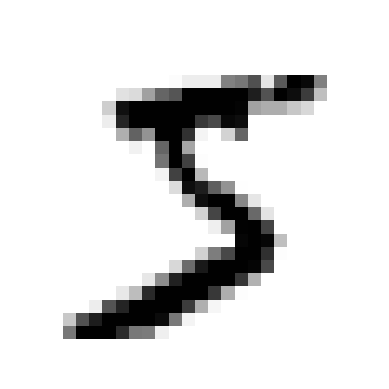

In [6]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

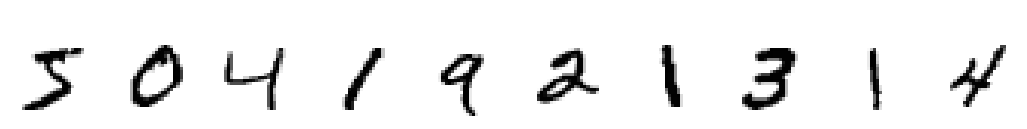

In [7]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='white', fontsize=16)
plt.show()

### <a name='a0'></a> Budowa sieci neuronowej

In [9]:
def build_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=10, activation='softmax'))

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    return model

model = build_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### <a name='a1'></a> Trenowanie modelu - Tensorboard

In [10]:
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime as dt

!rm -rf ./logs
log_dir = 'logs/fit/' + dt.now().strftime('%Y%m%d-%H%M%S')
tensorboard = TensorBoard(log_dir=log_dir)

In [11]:
model = build_model()
history = model.fit(X_train, y_train, epochs=8, validation_split=0.2, batch_size=32, callbacks=[tensorboard])

Epoch 1/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8438 - loss: 0.5335 - val_accuracy: 0.9517 - val_loss: 0.1665
Epoch 2/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9477 - loss: 0.1769 - val_accuracy: 0.9607 - val_loss: 0.1300
Epoch 3/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9629 - loss: 0.1241 - val_accuracy: 0.9668 - val_loss: 0.1079
Epoch 4/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9697 - loss: 0.1013 - val_accuracy: 0.9719 - val_loss: 0.0931
Epoch 5/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9738 - loss: 0.0832 - val_accuracy: 0.9750 - val_loss: 0.0853
Epoch 6/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9765 - loss: 0.0736 - val_accuracy: 0.9743 - val_loss: 0.0845
Epoch 7/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9814 - loss: 0.0589 - val_accuracy: 0.9747 - val_loss: 0.0879
Epoch 8/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9834 - loss: 0.0522 - va

In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

### <a name='a2'></a> Tensorboard Dev

In [14]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [15]:
!tensorboard dev upload --logdir logs

2025-02-12 11:02:49.147350: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739358169.176214    2900 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739358169.184373    2900 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
ERROR: The `tensorboard dev` command is no longer available.

TensorBoard.dev has been shut down. For further information,
see the FAQ at <https://tensorboard.dev/>.
